In [1]:
# 1️⃣ Gerekli Kütüphaneler
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import os

In [2]:
# 2️⃣ Fonksiyonlar

def load_geojson(url):
    """GeoJSON verisini yükler"""
    gdf = gpd.read_file(url)
    print(f"Veri yüklendi: {len(gdf)} satır")
    return gdf

def clean_data(gdf):
    """Gerekli kolonları seçer, eksik verileri temizler ve stringleri düzenler"""
    gdf = gdf[['ID','ADI','DURAK_KODU','geometry']]
    gdf = gdf.dropna(subset=['geometry'])
    gdf['ADI'] = gdf['ADI'].str.strip()
    print(f"Temizlenmiş veri: {len(gdf)} satır")
    return gdf

def save_data(gdf):
    """CSV ve GeoJSON olarak kaydeder"""
    if not os.path.exists("data"):
        os.makedirs("data")
    
    csv_path = "data/otobus_duraklari.csv"
    geojson_path = "data/otobus_duraklar_clean.geojson"
    
    gdf.to_csv(csv_path, index=False)
    gdf.to_file(geojson_path, driver="GeoJSON")
    
    print(f"Veri kaydedildi:\nCSV: {csv_path}\nGeoJSON: {geojson_path}")

def plot_static_map(gdf):
    """Matplotlib ile statik harita gösterir"""
    plt.figure(figsize=(12,12))
    gdf.plot(marker='o', color='blue', markersize=5)
    plt.title("İstanbul Otobüs Durakları (Statik Harita)")
    plt.show()

def plot_interactive_map(gdf, filename="data/otobus_duraklari_map.html"):
    """Folium ile interaktif harita oluşturur ve kaydeder"""
    m = folium.Map(location=[41.01, 29.01], zoom_start=11)
    
    for idx, row in gdf.iterrows():
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=3,
            popup=row['ADI'],
            color='red',
            fill=True
        ).add_to(m)
    
    m.save(filename)
    print(f"İnteraktif harita kaydedildi: {filename}")

def basic_analysis(gdf):
    """Veri hakkında temel özet bilgiler verir"""
    print("=== Temel Özet ===")
    print(f"Toplam durak sayısı: {len(gdf)}")
    print("Eksik değerler:\n", gdf.isnull().sum())
    duplicates = gdf[gdf.duplicated('ID')]
    print(f"Tekrar eden ID sayısı: {len(duplicates)}")

Veri yüklendi: 15316 satır
Temizlenmiş veri: 15316 satır
=== Temel Özet ===
Toplam durak sayısı: 15316
Eksik değerler:
 ID            0
ADI           0
DURAK_KODU    0
geometry      0
dtype: int64
Tekrar eden ID sayısı: 0
Veri kaydedildi:
CSV: data/otobus_duraklari.csv
GeoJSON: data/otobus_duraklar_clean.geojson


<Figure size 1200x1200 with 0 Axes>

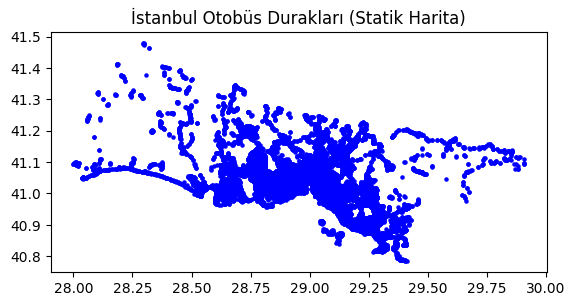

İnteraktif harita kaydedildi: data/otobus_duraklari_map.html


In [3]:
# 3️⃣ ETL Süreci

url = "https://data.ibb.gov.tr/dataset/af3c70e8-82d6-44e2-84cf-2e364c242227/resource/4f28ec8d-7c2d-477b-873d-d17ce5b5e3be/download/iett-otobus-duraklar.geojson"

gdf = load_geojson(url)
gdf = clean_data(gdf)
basic_analysis(gdf)
save_data(gdf)
plot_static_map(gdf)
plot_interactive_map(gdf)